<h1>Softmax Classifer 1D</h1>

In [29]:
# Import the libraries we need for this lab

import torch.nn as nn
import torch
import matplotlib.pyplot as plt 
import numpy as np
from torch.utils.data import Dataset, DataLoader

[Use of .view() function](https://stackoverflow.com/questions/42479902/how-does-the-view-method-work-in-pytorch)

In [30]:
# Create class for plotting

def plot_data(data_set, model = None, n = 1, color = False):
    X = data_set[:][0]
    Y = data_set[:][1]
    plt.plot(X[Y == 0, 0].numpy(), Y[Y == 0].numpy(), 'bo', label = 'y = 0')
    plt.plot(X[Y == 1, 0].numpy(), 0 * Y[Y == 1].numpy(), 'ro', label = 'y = 1')
    plt.plot(X[Y == 2, 0].numpy(), 0 * Y[Y == 2].numpy(), 'go', label = 'y = 2')
    plt.ylim((-0.1, 3))
    plt.legend()
    if model != None:
        w = list(model.parameters())[0][0].detach()
        b = list(model.parameters())[1][0].detach()
        y_label = ['yhat=0', 'yhat=1', 'yhat=2']
        y_color = ['b', 'r', 'g']
        Y = []
        for w, b, y_l, y_c in zip(model.state_dict()['0.weight'], model.state_dict()['0.bias'], y_label, y_color):
            Y.append((w * X + b).numpy())
            plt.plot(X.numpy(), (w * X + b).numpy(), y_c, label = y_l)
        if color == True:
            x = X.numpy()
            x = x.reshape(-1)
            top = np.ones(x.shape)
            y0 = Y[0].reshape(-1)
            y1 = Y[1].reshape(-1)
            y2 = Y[2].reshape(-1)
            plt.fill_between(x, y0, where = y1 > y1, interpolate = True, color = 'blue')
            plt.fill_between(x, y0, where = y1 > y2, interpolate = True, color = 'blue')
            plt.fill_between(x, y1, where = y1 > y0, interpolate = True, color = 'red')
            plt.fill_between(x, y1, where = ((y1 > y2) * (y1 > y0)),interpolate = True, color = 'red')
            plt.fill_between(x, y2, where = (y2 > y0) * (y0 > 0),interpolate = True, color = 'green')
            plt.fill_between(x, y2, where = (y2 > y1), interpolate = True, color = 'green')
    plt.legend()
    plt.show()

In [31]:
# Create the data class

class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-2, 2, 0.1).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0])
        self.y[(self.x > -1.0)[:, 0] * (self.x < 1.0)[:, 0]] = 1
        self.y[(self.x >= 1.0)[:, 0]] = 2
        self.y = self.y.type(torch.LongTensor)
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self,index):      
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

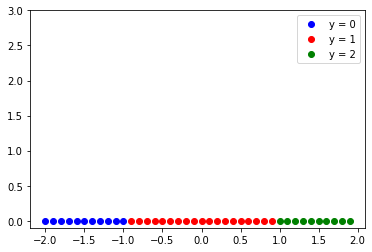

In [32]:
# Create the dataset object and plot the dataset object

data_set = Data()
data_set.x
plot_data(data_set)

In [33]:
# Build Softmax Classifier technically you only need nn.Linear

model = nn.Sequential(nn.Linear(1, 3))
model.state_dict()

OrderedDict([('0.weight', tensor([[ 0.8925],
                      [-0.9232],
                      [ 0.8808]])),
             ('0.bias', tensor([0.9847, 0.2848, 0.0284]))])

[CrossEntropyLoss() function documentation link](https://pytorch.org/docs/master/generated/torch.nn.CrossEntropyLoss.html)

In [34]:
# Create criterion function, optimizer, and dataloader

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
trainloader = DataLoader(dataset = data_set, batch_size = 5)

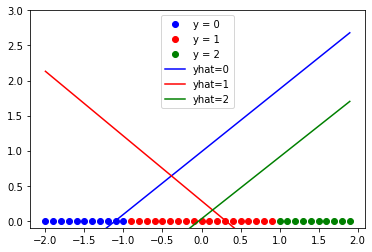

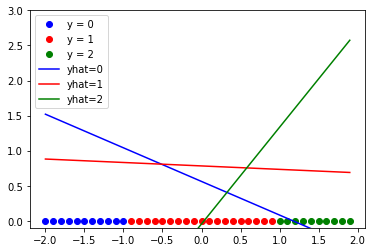

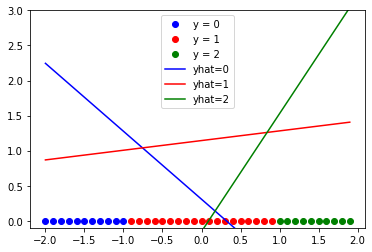

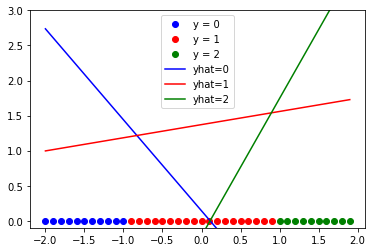

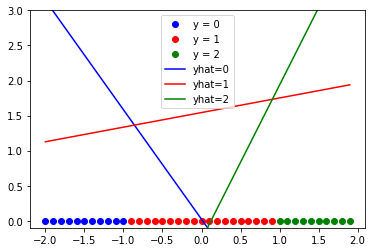

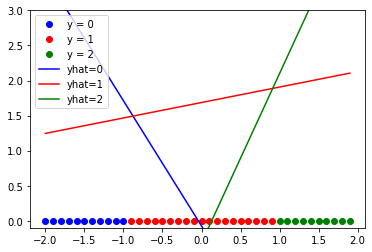

In [35]:
# Train the model

LOSS = []
def train_model(epochs):
    for epoch in range(epochs):
        if epoch % 50 == 0:
            pass
            plot_data(data_set, model)
        for x, y in trainloader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            LOSS.append(loss)
            loss.backward()
            optimizer.step()
train_model(300)

[How to use torch.max()](https://www.journaldev.com/39463/pytorch-torch-max)

In [36]:
# Make the prediction

z =  model(data_set.x)
_, yhat = z.max(1)
print("The prediction:", yhat)

The prediction: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


In [37]:
# Print the accuracy

correct = (data_set.y == yhat).sum().item()
accuracy = correct / len(data_set)
print("The accuracy: ", accuracy)

The accuracy:  0.975


In [38]:
Softmax_fn=nn.Softmax(dim=-1)
Probability =Softmax_fn(z)

In [39]:
for i in range(3):
    print("probability of class {} isg given by  {}".format(i, Probability[0,i]) )

probability of class 0 isg given by  0.920821487903595
probability of class 1 isg given by  0.07910018414258957
probability of class 2 isg given by  7.834184361854568e-05


<h1>Softmax Classifier</h1>


In [40]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

In [41]:
# The function to plot parameters

def PlotParameters(model): 
    W = model.state_dict()['linear.weight'].data
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace=0.01, wspace=0.1)
    for i, ax in enumerate(axes.flat):
        if i < 10:
            
            # Set the label for the sub-plot.
            ax.set_xlabel("class: {0}".format(i))

            # Plot the image.
            ax.imshow(W[i, :].view(28, 28), vmin=w_min, vmax=w_max, cmap='seismic')

            ax.set_xticks([])
            ax.set_yticks([])

        # Ensure the plot is shown correctly with multiple plots
        # in a single Notebook cell.
    plt.show()

# Plot the data

def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    #plt.title('y = ' + str(data_sample[1].item()))
    plt.title('y = ' + str(data_sample[1]))

Load the training dataset by setting the parameters <code>train</code> to <code>True</code> and convert it to a tensor by placing a transform object in the argument <code>transform</code>.

In [42]:
# Create and print the training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
print("Print the training dataset:\n ", train_dataset)

Print the training dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [43]:
# Create and print the validating dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
print("Print the validating dataset:\n ", validation_dataset)

Print the validating dataset:
  Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()


Type of data element:  <class 'int'>
The label:  1
The image:  None


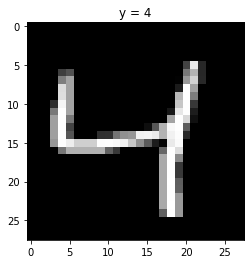

In [60]:
# Print the type of the element

#print("Type of data element: ", train_dataset[0][1].type())
print("Type of data element: ", type(train_dataset[0][1])) #should be a tensor idk where i am making mistake

# Print the label

print("The label: ", train_dataset[3][1])

# Plot the image

print("The image: ", show_data(train_dataset[3]))

# Plot the image

show_data(train_dataset[2])

In [45]:
# Define softmax classifier class

class SoftMax(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(SoftMax, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # Prediction
    def forward(self, x):
        z = self.linear(x)
        return z

In [46]:
# Print the shape of train dataset

train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [47]:
# Set input size and output size

input_dim = 28 * 28
output_dim = 10

In [48]:
# Create the model

model = SoftMax(input_dim, output_dim)
print("Print the model:\n ", model)

# Print the parameters

print('W: ',list(model.parameters())[0].size())
print('b: ',list(model.parameters())[1].size())

Print the model:
  SoftMax(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)
W:  torch.Size([10, 784])
b:  torch.Size([10])


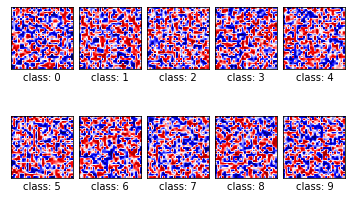

In [49]:
# Plot the model parameters for each class

PlotParameters(model)

In [50]:
# Define the learning rate, optimizer, criterion and data loader

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

In [51]:
# Train the model

n_epochs = 10
loss_list = []
accuracy_list = []
N_test = len(validation_dataset)

def train_model(n_epochs):
    for epoch in range(n_epochs):
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            
        correct = 0
        # perform a prediction on the validationdata  
        for x_test, y_test in validation_loader:
            z = model(x_test.view(-1, 28 * 28))
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        loss_list.append(loss.data)
        accuracy_list.append(accuracy)

train_model(n_epochs)

Analyze results

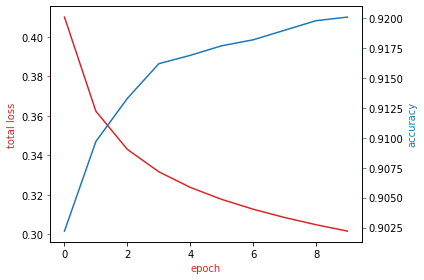

In [52]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

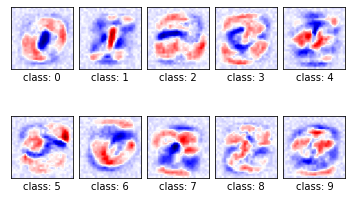

In [53]:
# Plot the parameters

PlotParameters(model)

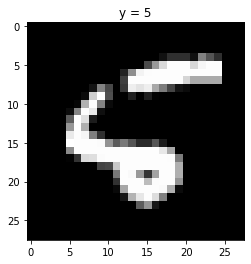

yhat: tensor([6])
probability of class  0.9893950819969177


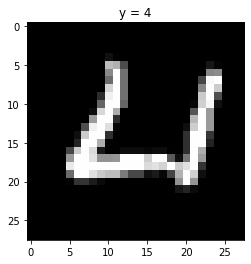

yhat: tensor([6])
probability of class  0.4399040639400482


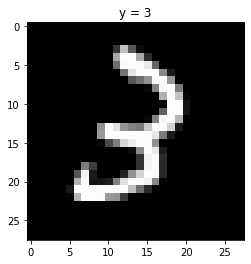

yhat: tensor([2])
probability of class  0.6892122030258179


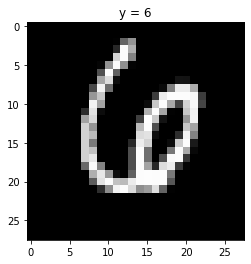

yhat: tensor([7])
probability of class  0.3430548310279846


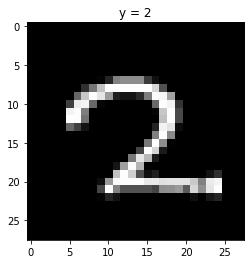

yhat: tensor([7])
probability of class  0.5324029922485352


In [54]:
# Plot the misclassified samples
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break 

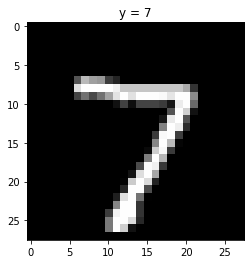

yhat: tensor([7])
probability of class  0.9968846440315247


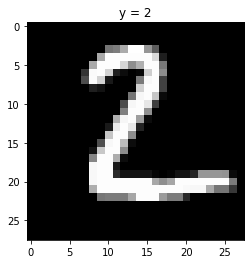

yhat: tensor([2])
probability of class  0.9449818730354309


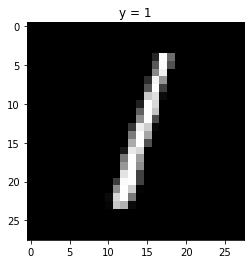

yhat: tensor([1])
probability of class  0.9752269983291626


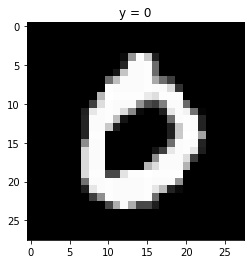

yhat: tensor([0])
probability of class  0.9995939135551453


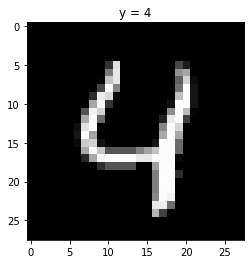

yhat: tensor([4])
probability of class  0.9471434354782104


In [55]:
# Plot the classified samples
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat == y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break  